# Set-up

In [44]:
# imports
import os
import sys
import synapseclient
import numpy as np
import pandas as pd
import scanpy as sc
import mudata

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.container import BarContainer

from matplotlib_venn import venn3

In [2]:
path_out = "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Hon_WTC11-benchmark_TF-Perturb-seq/results/1_CRISPR_pipeline/2025_12_17"

# Download

In [3]:
# Token
SYNAPSE_AUTH_TOKEN = os.environ.get('SYNAPSE_AUTH_TOKEN')

In [4]:
# Login
syn = synapseclient.Synapse() 
syn.login(authToken=SYNAPSE_AUTH_TOKEN)

Welcome, Adam Klie!



In [6]:
# Obtain a pointer and download the data 
#syn = syn.get(entity='syn70776514', downloadLocation=path_out)
 
# Get the path to the local copy of the data file 
#filepath = syn.path 

# Transfer from GCP bucket to local
#path_gcp_folder = "igvf-pertub-seq-pipeline-data/work/68/81be87d1655e155c98e2fc1cc75e3c"
#cmd = f"gsutil -m cp -r gs://{path_gcp_folder}/* {path_out}/"
#print(cmd)
#os.system(cmd)

# Out MuData
#path_gcp = "https://storage.googleapis.com/igvf-pertub-seq-pipeline-data/work/99/304b545580e299107b2429dd55a968/inference_mudata.h5mu"
#path_local = os.path.join(path_out, "inference_mudata.h5mu")
#cmd = f"gsutil cp {path_gcp} {path_local}"
#print(cmd)
#os.system(cmd)

# Another version
# path_gcp = "gs://igvf-pertub-seq-pipeline-data/scratch/bioinfolucas/adam_benchmark_new_no_bug_sceptre/inference_mudata.h5mu"
# path_local = os.path.join(path_out, "inference_mudata.h5mu")
# cmd = f"gsutil cp {path_gcp} {path_local}"
# print(cmd)
# os.system(cmd)

# Another version 2 igvf-pertub-seq-pipeline-data/scratch/bioinfolucas/haam_benchmark_new_no_bug_sceptre
path_gcp = "gs://igvf-pertub-seq-pipeline-data/scratch/bioinfolucas/haam_benchmark_new_no_bug_sceptre/inference_mudata.h5mu"
path_local = os.path.join(path_out, "inference_mudata.h5mu")
cmd = f"gsutil cp {path_gcp} {path_local}"
print(cmd)
os.system(cmd)

gsutil cp gs://igvf-pertub-seq-pipeline-data/scratch/bioinfolucas/haam_benchmark_new_no_bug_sceptre/inference_mudata.h5mu /cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Hon_WTC11-benchmark_TF-Perturb-seq/results/1_CRISPR_pipeline/2025_12_17/inference_mudata.h5mu


Copying gs://igvf-pertub-seq-pipeline-data/scratch/bioinfolucas/haam_benchmark_new_no_bug_sceptre/inference_mudata.h5mu...
| [1 files][856.2 MiB/856.2 MiB]                                                
Operation completed over 1 objects/856.2 MiB.                                    


0

# Load MuData

In [7]:
path_mdata = "/cellar/users/aklie/data/datasets/tf_perturb_seq/datasets/Hon_WTC11-benchmark_TF-Perturb-seq/results/1_CRISPR_pipeline/2025_12_17/inference_mudata.h5mu"

In [8]:
mdata = mudata.read_h5mu(path_mdata)
mdata

[WARNING] /cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py39/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(

[WARNING] /cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py39/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(

[WARNING] /cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py39/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(



MuData object with n_obs × n_vars = 81887 × 9773
  obs:	'cov1', 'batch'
  uns:	'cis_per_element_results', 'cis_per_guide_results', 'trans_per_element_results', 'trans_per_guide_results'
  3 modalities
    gene:	81887 x 9345
      obs:	'batch', 'cov1', 'batch_number', 'n_counts', 'log1p_n_genes_by_counts', 'total_gene_umis', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'percent_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'num_expressed_genes'
      var:	'symbol', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'gene_chr', 'gene_start', 'gene_end'
    guide:	81887 x 416
      obs:	'batch', 'cov1', 'num_expressed_guides', 'total_guide_umis', 'batch_number'
      var:	'guide_id', 'spacer', 'targeting', 'type', 'guide_chr', 'guide_start', 'guide_end', 'strand', 'pam', 'genomic_element', 'intended_target_name', 'intended_target_chr', 'intended_target_start', 'intended_target_end', 'putative_target_genes', 'reporter', 'imperfect', 'gene_name', 'label'
      uns:	'capture_method', 'moi'
      layers:	'guide_assignment'
    hashing:	81887 x 12
      obs:	'batch', 'cov1', 'cluster_id', 'hto_type', 'hto_type_split'

[WARNING] /tmp/ipykernel_1481883/2537075889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="batch", data=mdata.obs, ax=ax, palette="tab10")



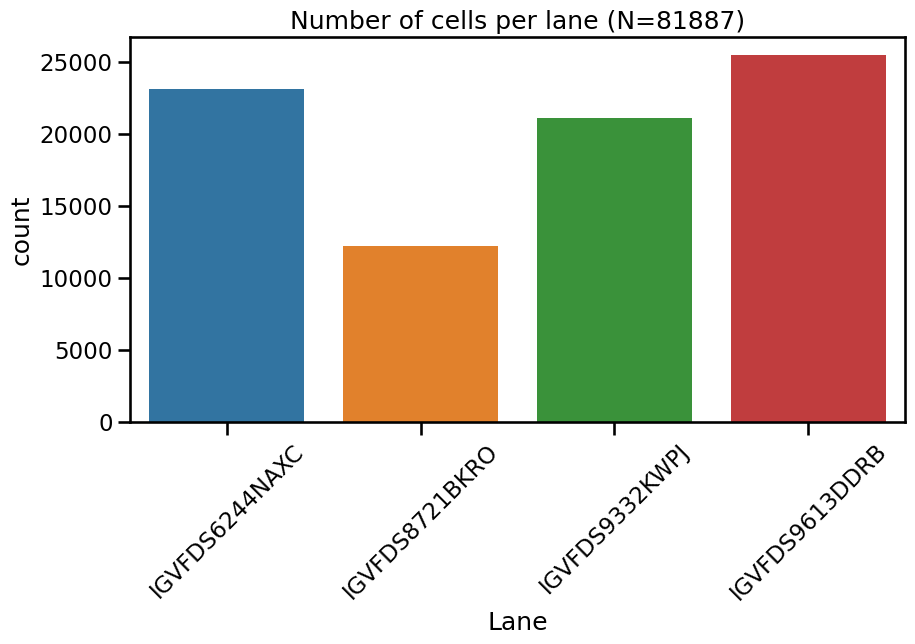

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot the number of cells per batch and color each bar individually
with sns.plotting_context("talk"):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x="batch", data=mdata.obs, ax=ax, palette="tab10")
    ax.set_title(f"Number of cells per lane (N={mdata.n_obs})")

    # rotate x labels
    plt.xlabel("Lane")
    plt.xticks(rotation=45)
    plt.show()
    
    plt.tight_layout()

# Transcriptome QC

In [10]:
gene = mdata["gene"]
gene

AnnData object with n_obs × n_vars = 81887 × 9345
    obs: 'batch', 'cov1', 'batch_number', 'n_counts', 'log1p_n_genes_by_counts', 'total_gene_umis', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'percent_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'num_expressed_genes'
    var: 'symbol', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'gene_chr', 'gene_start', 'gene_end'

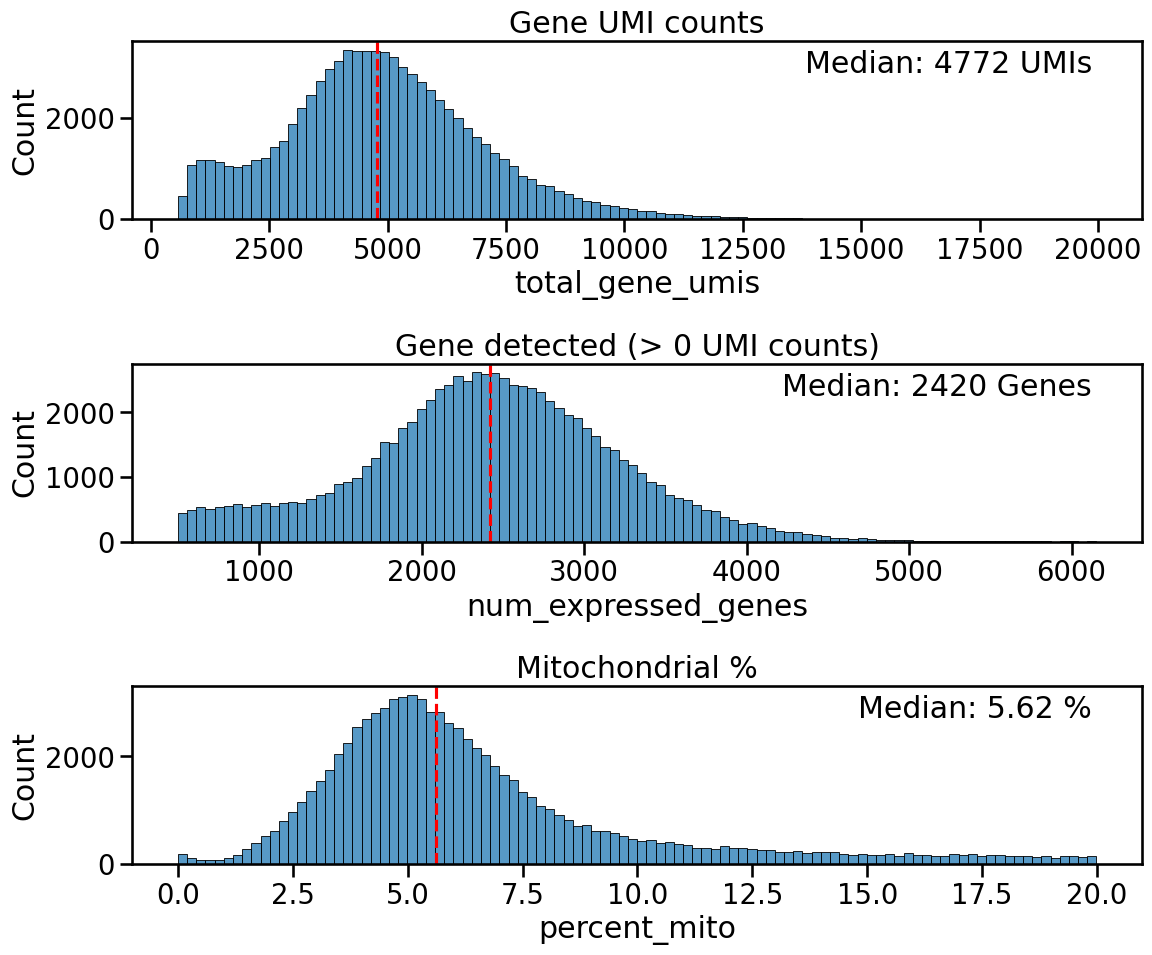

In [11]:
# Like these better: plot the distribution of UMI counts and annotate with median (red dashed line and text in upper right corner)
with sns.plotting_context("talk", font_scale=1.2):
    fig, ax = plt.subplots(3, 1, figsize=(12, 10))

    # Plotting total counts
    sns.histplot(gene.obs["total_gene_umis"], bins=100, ax=ax[0])
    ax[0].axvline(gene.obs["total_gene_umis"].median(), color="red", linestyle="--")
    ax[0].text(0.95, 0.95, f"Median: {gene.obs['total_gene_umis'].median():.0f} UMIs", ha="right", va="top", transform=ax[0].transAxes)
    ax[0].set_title("Gene UMI counts")

    # Plotting percentage of mitochondrial genes
    sns.histplot(gene.obs["num_expressed_genes"], bins=100, ax=ax[1])
    ax[1].axvline(gene.obs["num_expressed_genes"].median(), color="red", linestyle="--")
    ax[1].text(0.95, 0.95, f"Median: {gene.obs['num_expressed_genes'].median():.0f} Genes", ha="right", va="top", transform=ax[1].transAxes)
    ax[1].set_title("Gene detected (> 0 UMI counts)")

    # Plotting percentage of mitochondrial genes
    sns.histplot(gene.obs["percent_mito"], bins=100, ax=ax[2])
    ax[2].axvline(gene.obs["percent_mito"].median(), color="red", linestyle="--")
    ax[2].text(0.95, 0.95, f"Median: {gene.obs['percent_mito'].median():.2f} %", ha="right", va="top", transform=ax[2].transAxes)
    ax[2].set_title("Mitochondrial %")

    plt.tight_layout()
    plt.show()

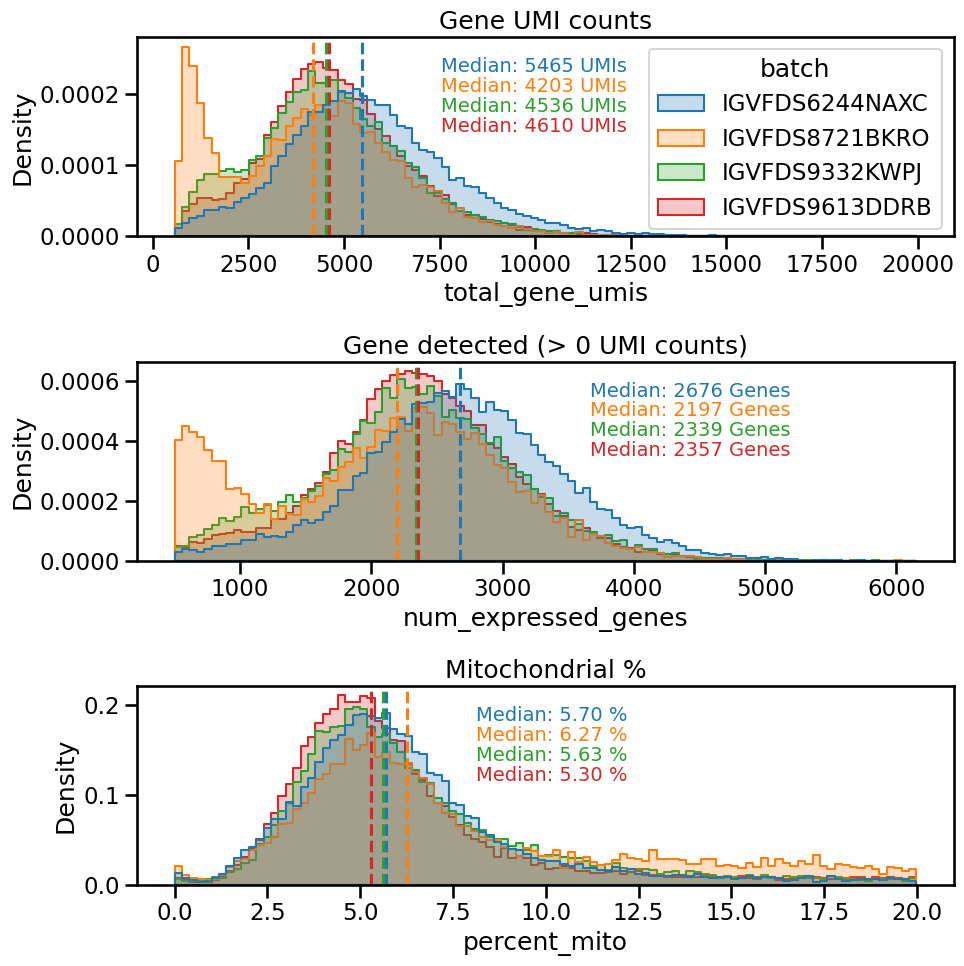

In [12]:
# Split the above by batch with different colors, add dotted lines for medians, one legend to right of plots
batch_colors = sns.color_palette("tab10", n_colors=gene.obs["batch"].nunique())
batch_color_dict = dict(zip(gene.obs["batch"].unique(), batch_colors))

with sns.plotting_context("talk", font_scale=1):
    fig, ax = plt.subplots(3, 1, figsize=(10, 10))

    # Plotting total counts
    sns.histplot(data=gene.obs, x="total_gene_umis", bins=100, hue="batch", palette=batch_color_dict, ax=ax[0], element="step", stat="density", common_norm=False)
    for batch in gene.obs["batch"].unique():
        median_val = gene.obs.loc[gene.obs["batch"] == batch, "total_gene_umis"].median()
        ax[0].axvline(median_val, color=batch_color_dict[batch], linestyle="--")
        ax[0].text(0.6, 0.9 - 0.1 * list(gene.obs["batch"].unique()).index(batch), f"Median: {median_val:.0f} UMIs", ha="right", va="top", transform=ax[0].transAxes, color=batch_color_dict[batch], fontsize=14)
    ax[0].set_title("Gene UMI counts")

    # Plotting number of expressed genes
    sns.histplot(data=gene.obs, x="num_expressed_genes", bins=100, hue="batch", palette=batch_color_dict, ax=ax[1], element="step", stat="density", common_norm=False)
    for batch in gene.obs["batch"].unique():
        median_val = gene.obs.loc[gene.obs["batch"] == batch, "num_expressed_genes"].median()
        ax[1].axvline(median_val, color=batch_color_dict[batch], linestyle="--")
        ax[1].text(0.8, 0.9 - 0.1 * list(gene.obs["batch"].unique()).index(batch), f"Median: {median_val:.0f} Genes", ha="right", va="top", transform=ax[1].transAxes, color=batch_color_dict[batch], fontsize=14)
    ax[1].set_title("Gene detected (> 0 UMI counts)")
    ax[1].legend_.remove()

    # Plotting percentage of mitochondrial genes
    sns.histplot(data=gene.obs, x="percent_mito", bins=100, hue="batch", palette=batch_color_dict, ax=ax[2], element="step", stat="density", common_norm=False)
    for batch in gene.obs["batch"].unique():
        median_val = gene.obs.loc[gene.obs["batch"] == batch, "percent_mito"].median()
        ax[2].axvline(median_val, color=batch_color_dict[batch], linestyle="--")
        ax[2].text(0.6, 0.9 - 0.1 * list(gene.obs["batch"].unique()).index(batch), f"Median: {median_val:.2f} %", ha="right", va="top", transform=ax[2].transAxes, color=batch_color_dict[batch], fontsize=14)
    ax[2].set_title("Mitochondrial %")
    ax[2].legend_.remove()

    plt.tight_layout()
    plt.show()

# Guide QC

In [13]:
guide = mdata["guide"]
guide

AnnData object with n_obs × n_vars = 81887 × 416
    obs: 'batch', 'cov1', 'num_expressed_guides', 'total_guide_umis', 'batch_number'
    var: 'guide_id', 'spacer', 'targeting', 'type', 'guide_chr', 'guide_start', 'guide_end', 'strand', 'pam', 'genomic_element', 'intended_target_name', 'intended_target_chr', 'intended_target_start', 'intended_target_end', 'putative_target_genes', 'reporter', 'imperfect', 'gene_name', 'label'
    uns: 'capture_method', 'moi'
    layers: 'guide_assignment'

In [14]:
guide.var["label"].value_counts()

label
tf_targeting        324
negative_control     54
non_targeting        30
positive_control      8
Name: count, dtype: int64

In [15]:
# Calculate n_guides_per_cell and n_cells_per_guide from layers["guide_assignment"]
guide.obs["n_guides_per_cell"] = np.sum(guide.layers["guide_assignment"] > 0, axis=1).A1
guide.var["n_cells_per_guide"] = np.sum(guide.layers["guide_assignment"] > 0, axis=0).A1

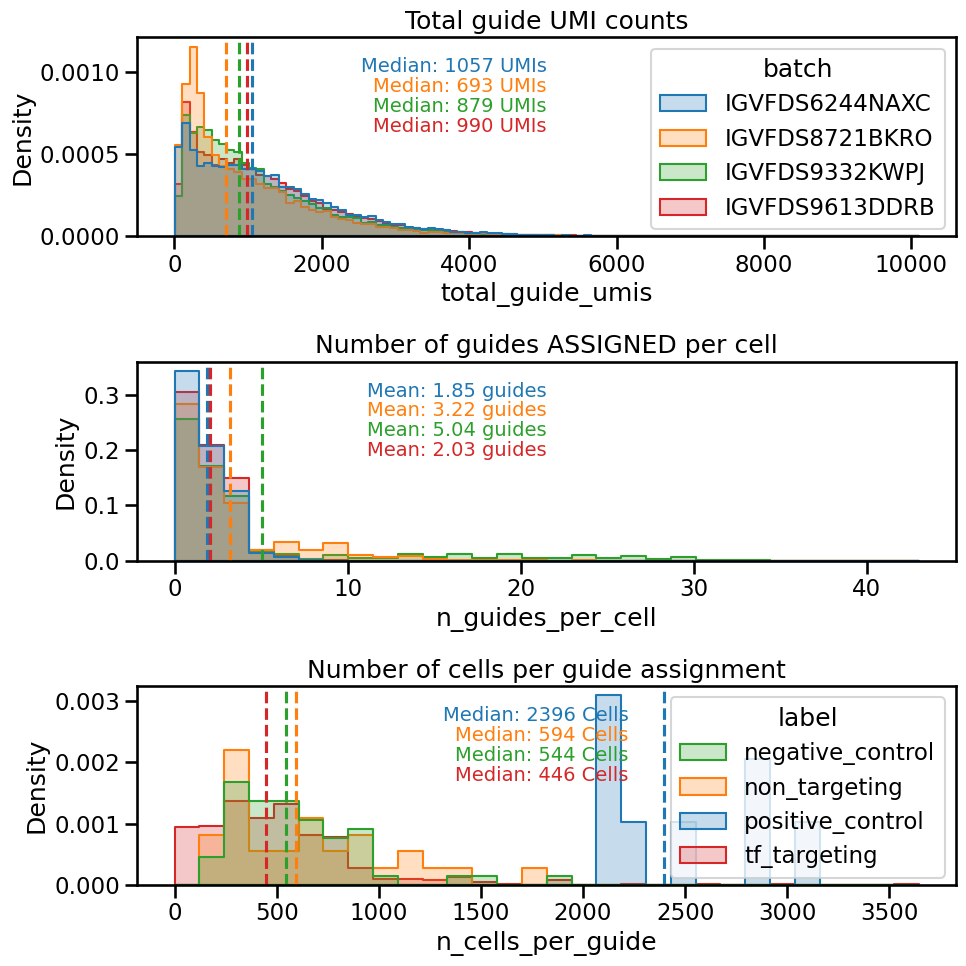

In [16]:
# Plot the distribution of UMI counts and annotate with median (red dashed line and text in upper right corner)
guide_label_colors = sns.color_palette("tab10", n_colors=guide.var["label"].nunique())
guide_label_color_dict = dict(zip(guide.var["label"].unique(), guide_label_colors))

with sns.plotting_context("talk", font_scale=1):
    

    fig, ax = plt.subplots(3, 1, figsize=(10, 10))

    # Guide umis per cell
    sns.histplot(data=guide.obs, x="total_guide_umis", bins=100, hue="batch", palette=batch_color_dict, ax=ax[0], element="step", stat="density", common_norm=False)
    for batch in guide.obs["batch"].unique():
        median_val = guide.obs.loc[guide.obs["batch"] == batch, "total_guide_umis"].median()
        ax[0].axvline(median_val, color=batch_color_dict[batch], linestyle="--")
        ax[0].text(0.5, 0.9 - 0.1 * list(guide.obs["batch"].unique()).index(batch), f"Median: {median_val:.0f} UMIs", ha="right", va="top", transform=ax[0].transAxes, color=batch_color_dict[batch], fontsize=14)
    ax[0].set_title("Total guide UMI counts")
        
    # n_guides_per_cell
    sns.histplot(data=guide.obs, x="n_guides_per_cell", bins=30, hue="batch", palette=batch_color_dict, ax=ax[1], element="step", stat="density", common_norm=False)
    for batch in guide.obs["batch"].unique():
        mean_val = guide.obs.loc[guide.obs["batch"] == batch, "n_guides_per_cell"].mean()
        ax[1].axvline(mean_val, color=batch_color_dict[batch], linestyle="--")
        ax[1].text(0.5, 0.9 - 0.1 * list(guide.obs["batch"].unique()).index(batch), f"Mean: {mean_val:.2f} guides", ha="right", va="top", transform=ax[1].transAxes, color=batch_color_dict[batch], fontsize=14)
    ax[1].set_title("Number of guides ASSIGNED per cell")
    ax[1].legend_.remove()

    # n_cells_per_guide
    sns.histplot(data=guide.var, x="n_cells_per_guide", bins=30, hue="label", palette=guide_label_color_dict, ax=ax[2], element="step", stat="density", common_norm=False)
    median_val = guide.var["n_cells_per_guide"].median()
    for label in guide.var["label"].unique():
        median_val = guide.var.loc[guide.var["label"] == label, "n_cells_per_guide"].median()
        ax[2].axvline(median_val, color=guide_label_color_dict[label], linestyle="--")
        ax[2].text(0.6, 0.9 - 0.1 * list(guide.var["label"].unique()).index(label), f"Median: {median_val:.0f} Cells", ha="right", va="top", transform=ax[2].transAxes, color=guide_label_color_dict[label], fontsize=14)
    ax[2].set_title("Number of cells per guide assignment")

    plt.tight_layout()
    plt.show()

# HTO QC

In [17]:
hashing = mdata.mod["hashing"]

In [19]:
hashing

AnnData object with n_obs × n_vars = 81887 × 12
    obs: 'batch', 'cov1', 'cluster_id', 'hto_type', 'hto_type_split'

# More metrics

In [23]:
batch_order = ["IGVFDS9332KWPJ", "IGVFDS8721BKRO", "IGVFDS9613DDRB", "IGVFDS6244NAXC"]
batch_colors = {
    'IGVFDS6244NAXC': '#1f77b4',
    'IGVFDS8721BKRO': '#ff7f0e',
    'IGVFDS9332KWPJ': '#2ca02c',
    'IGVFDS9613DDRB': '#d62728',
}

In [25]:
# Get the median UMI/cell in gene
for batch in batch_order:
    median_umi = gene.obs.loc[gene.obs["batch"] == batch, "total_gene_umis"].median()
    print(f"Batch {batch}: Median UMI/cell in gene: {median_umi:.0f}")
for batch in batch_order:
    median_umi = gene.obs.loc[gene.obs["batch"] == batch, "total_gene_umis"].median()
    print(f"{median_umi:.0f}")

Batch IGVFDS9332KWPJ: Median UMI/cell in gene: 4536
Batch IGVFDS8721BKRO: Median UMI/cell in gene: 4203
Batch IGVFDS9613DDRB: Median UMI/cell in gene: 4610
Batch IGVFDS6244NAXC: Median UMI/cell in gene: 5465
4536
4203
4610
5465


In [26]:
# get the median UMI/cell in guide
for batch in batch_order:
    median_umi = guide.obs.loc[guide.obs["batch"] == batch, "total_guide_umis"].median()
    print(f"Batch {batch}: Median UMI/cell in guide: {median_umi:.0f}")
for batch in batch_order:
    median_umi = guide.obs.loc[guide.obs["batch"] == batch, "total_guide_umis"].median()
    print(f"{median_umi:.0f}")

Batch IGVFDS9332KWPJ: Median UMI/cell in guide: 879
Batch IGVFDS8721BKRO: Median UMI/cell in guide: 693
Batch IGVFDS9613DDRB: Median UMI/cell in guide: 990
Batch IGVFDS6244NAXC: Median UMI/cell in guide: 1057
879
693
990
1057


In [27]:
# get the number of cells per lane
for batch in batch_order:
    n_cells = mdata.obs.loc[mdata.obs["batch"] == batch].shape[0]
    print(f"Batch {batch}: Number of cells: {n_cells}")
for batch in batch_order:
    n_cells = mdata.obs.loc[mdata.obs["batch"] == batch].shape[0]
    print(f"{n_cells}")

Batch IGVFDS9332KWPJ: Number of cells: 21110
Batch IGVFDS8721BKRO: Number of cells: 12229
Batch IGVFDS9613DDRB: Number of cells: 25444
Batch IGVFDS6244NAXC: Number of cells: 23104
21110
12229
25444
23104


In [28]:
# Get a the number of cells that have exactly 1 guide in each batch
for batch in batch_order:
    n_cells_1_guide = np.sum((guide.obs["n_guides_per_cell"] == 1) & (guide.obs["batch"] == batch))
    print(f"Batch {batch}: {n_cells_1_guide} cells with exactly 1 guide assigned")
for batch in batch_order:
    n_cells_1_guide = np.sum((guide.obs["n_guides_per_cell"] == 1) & (guide.obs["batch"] == batch))
    print(f"{n_cells_1_guide}")

Batch IGVFDS9332KWPJ: 7726 cells with exactly 1 guide assigned
Batch IGVFDS8721BKRO: 4944 cells with exactly 1 guide assigned
Batch IGVFDS9613DDRB: 11125 cells with exactly 1 guide assigned
Batch IGVFDS6244NAXC: 11316 cells with exactly 1 guide assigned
7726
4944
11125
11316


In [30]:
# Get the number that have >0 guides in each batch
for batch in batch_order:
    n_cells_gt0_guide = np.sum((guide.obs["n_guides_per_cell"] > 0) & (guide.obs["batch"] == batch))
    print(f"Batch {batch}: {n_cells_gt0_guide} cells with >0 guides assigned")
for batch in batch_order:
    n_cells_gt0_guide = np.sum((guide.obs["n_guides_per_cell"] > 0) & (guide.obs["batch"] == batch))
    print(f"{n_cells_gt0_guide}")

Batch IGVFDS9332KWPJ: 21096 cells with >0 guides assigned
Batch IGVFDS8721BKRO: 12194 cells with >0 guides assigned
Batch IGVFDS9613DDRB: 25414 cells with >0 guides assigned
Batch IGVFDS6244NAXC: 23066 cells with >0 guides assigned
21096
12194
25414
23066


In [31]:
# get mean guides assigned per cell in each batch
for batch in batch_order:
    mean_guides_per_cell = guide.obs.loc[guide.obs["batch"] == batch, "n_guides_per_cell"].mean()
    print(f"Batch {batch}: Mean guides assigned per cell: {mean_guides_per_cell:.2f}")
for batch in batch_order:
    mean_guides_per_cell = guide.obs.loc[guide.obs["batch"] == batch, "n_guides_per_cell"].mean()
    print(f"{mean_guides_per_cell:.2f}")

Batch IGVFDS9332KWPJ: Mean guides assigned per cell: 5.04
Batch IGVFDS8721BKRO: Mean guides assigned per cell: 3.22
Batch IGVFDS9613DDRB: Mean guides assigned per cell: 2.03
Batch IGVFDS6244NAXC: Mean guides assigned per cell: 1.85
5.04
3.22
2.03
1.85


In [32]:
# Get max guides assigned per cell in each batch
for batch in guide.obs["batch"].unique():
    max_guides_per_cell = guide.obs.loc[guide.obs["batch"] == batch, "n_guides_per_cell"].max()
    print(f"Batch {batch}: Max guides assigned per cell: {max_guides_per_cell}")
for batch in batch_order:
    max_guides_per_cell = guide.obs.loc[guide.obs["batch"] == batch, "n_guides_per_cell"].max()
    print(f"{max_guides_per_cell}")

Batch IGVFDS6244NAXC: Max guides assigned per cell: 14
Batch IGVFDS8721BKRO: Max guides assigned per cell: 43
Batch IGVFDS9332KWPJ: Max guides assigned per cell: 40
Batch IGVFDS9613DDRB: Max guides assigned per cell: 20
40
43
20
14


# DONE!

---